## A Gentle Introduction to Pooling Layers for Convolutional Neural Networks

### Tutorial Overview

This tutorial is divided into five parts; they are:

- Pooling
- Detecting Vertical Lines
- Average Pooling Layers
- Max Pooling Layers
- Global Pooling Layers

### Reference

https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/

In [51]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# @Date    : Nov-10-20 20:51
# @Author  : Kelly Hwong (dianhuangkan@gmail.com)
# @RefLink : https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

import matplotlib.pyplot as plt

## Detecting Vertical Lines

In [52]:
# define input data
data = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0]]
data = np.asarray(data)
data = data.reshape(1, 8, 8, 1)

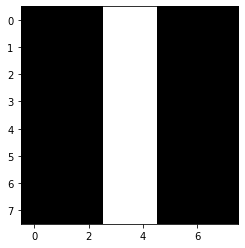

In [53]:
plt.imshow(data[0,:,:,0], cmap="gray")

In [54]:
# create model
model = Sequential()
model.add(Conv2D(1, (3,3), activation='relu', input_shape=(8, 8, 1)))
# summarize model
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 6, 6, 1)           10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [55]:
# # define a vertical line detector
detector = [[0, 1, 0],
            [0, 1, 0],
            [0, 1, 0]]
detector = np.asarray(detector)
detector = detector.reshape(3, 3, 1, 1)

In [56]:
# store the weights in the model
weights = [detector, np.asarray([0.0])]
model.set_weights(weights)

[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]


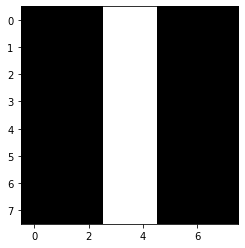

In [57]:
# apply filter to input data
y_hat = model.predict(data)
plt.imshow(data[0,:,:,0], cmap="gray")
# enumerate and print rows
for r in range(y_hat.shape[1]):
	# print each column in the row
	print([y_hat[0,r,c,0] for c in range(y_hat.shape[2])])

## Common approaches to pooling

We can now look at some common approaches to pooling and how they impact the output feature maps.

- Average Pooling Layer
- Max Pooling Layer
- Global Pooling Layers

### Average Pooling Layer

In [58]:
# create model
model = Sequential()
model.add(Conv2D(1, (3,3), activation='relu', input_shape=(8, 8, 1)))
model.add(AveragePooling2D())
# summarize model
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 6, 6, 1)           10        
_________________________________________________________________
average_pooling2d_1 (Average (None, 3, 3, 1)           0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [59]:
# store the weights in the model
weights = [detector, np.asarray([0.0])]
model.set_weights(weights)

(1, 3, 3, 1)
[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]


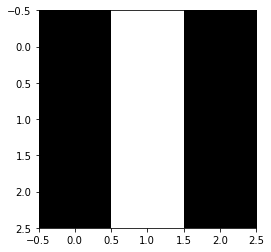

In [60]:
# apply filter to input data
y_hat = model.predict(data)
print(y_hat.shape)
plt.imshow(y_hat[0,:,:,0], cmap="gray")
# enumerate and print rows
for r in range(y_hat.shape[1]):
	# print each column in the row
	print([y_hat[0,r,c,0] for c in range(y_hat.shape[2])])

### Max Pooling Layer

In [61]:
# create model
model = Sequential()
model.add(Conv2D(1, (3,3), activation='relu', input_shape=(8, 8, 1)))
model.add(MaxPooling2D())
# summarize model
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 6, 6, 1)           10        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 1)           0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [62]:
# store the weights in the model
weights = [detector, np.asarray([0.0])]
model.set_weights(weights)

(1, 3, 3, 1)
[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]


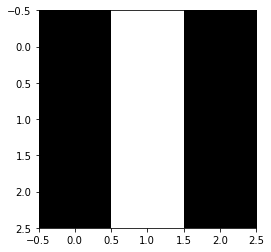

In [63]:
# apply filter to input data
y_hat = model.predict(data)
print(y_hat.shape)
plt.imshow(y_hat[0,:,:,0], cmap="gray")
# enumerate and print rows
for r in range(y_hat.shape[1]):
	# print each column in the row
	print([y_hat[0,r,c,0] for c in range(y_hat.shape[2])])

### Global Pooling Layers

In [64]:
# create model
model = Sequential()
model.add(Conv2D(1, (3,3), activation='relu', input_shape=(8, 8, 1)))
model.add(GlobalMaxPooling2D())
# summarize model
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 6, 6, 1)           10        
_________________________________________________________________
global_max_pooling2d_2 (Glob (None, 1)                 0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [65]:
# store the weights in the model
weights = [detector, np.asarray([0.0])]
model.set_weights(weights)

In [66]:
# apply filter to input data
y_hat = model.predict(data)
print(y_hat.shape)
print(y_hat)

(1, 1)
[[3.]]
